# Introduction to Binary Classification with Logistic Regression

© Explore Data Science Academy

## Learning Objectives
In this train you will learn how to:

- Understand binary classification;
- Understand logistic regression;
- Implement a logistic regression model in `sklearn`.

## Outline

This train is structured as follows:

- Introduction to binary classification;
- Introduction to logistic regression;
- Implementing a logistic regression model in `sklearn`.

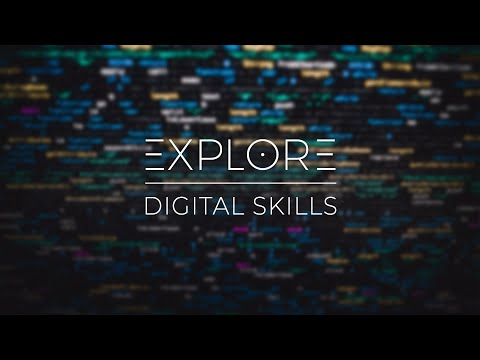

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('m2HHCItAMjI', width=940, height=500)

## Binary Classification

### Quantitative vs. qualitative variables

In this course we have explored a variety of ways which we can use to predict a response variable _Y_ when that response is quantitative, or numerical, in nature. The numerical variables we often predict typically exist on a continuous scale, and we can therefore fit things like a linear regression which, for increasing values of X, there's appropriate increasing/decreasing values of Y. An example of linear regression is shown below.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-linear-reg.png" alt="sketch-linear-reg" style="width: 400px;"/>

In some cases, however, the response variable Y in our dataset will not be continuous - it will be categorical(qualitative). The prediction task in this case is known as _classification,_ because we are trying to _classify_ into which category an observation belongs.

The simplest version of this scenario is known as _binary classification_. Binary refers to the fact that there are two categories. It is normally intuitive to encode the two classes in a binary classification task as zeroes and ones.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-categorical-y.png" alt="sketch-categorical-y" style="width: 300px"/>

With our response variable encoded as zeroes and ones, we are able to plot some of the data points for a predictor variable X, and see the peculiar problem we are faced with: the response values lie along two distinct horizontal lines. What's more, they only ever take on values of 0 and 1! Clearly no good for a linear regression, which is only ever monotonically increasing or decreasing.

Looking at the values for Y which lie along an example linear regression line, we can see that for very large X, we will be getting values for Y which are greater than 1, and as X decreases, we may even get negative Y values - far from the zeroes and ones we need.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-linear-classification.png" alt="sketch-linear-classification" style="width: 450px;"/>

## Logistic Regression

The solution to this problem is known as *logistic regression*, so-called because it makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a _sigmoid_. It solves the problem for the following reasons:

- It squeezes the range of output values to exist only between 0 and 1.
- It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
- It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-logistic-regression.png" alt="sketch-logistic-regression" style="width: 600px;"/>

The name is a little confusing because it contains the word _regression_. That's because we are effectively doing a linear regression, but then squeezing that linear regression vertically down into the S-shape sigmoid curve, so that it exists between 0 and 1. Rest assured - this is definitely a **classification model**.

The logistic regression model produces output values for the response variable which again lie on the curve itself. However, unlike regression, where the output value was also the prediction value, in logistic regression the output value is a _probability_. The value along the curve (which, remember, is always between zero and one), is equal to the probability of the observation belonging to class 1 in our dataset.

### The Logistic Function

We now know that the output value of a logistic regression model refers to the probability that the observation in question belongs to class 1. The output values all fall between 0 and 1, which is all very well. But at what threshold value do we decide that a probability is too low to be assigned to class 1? Usually, we pick 0.5. That is:

- Values greater than or equal to 0.5 are assigned to class 1; and
- Values less than 0.5 are assigned to class 0.

This output needs to hold for all values of X. In other words, regardless of the value of X, we need the output to be a value between 0 and 1. The function that takes care of all this is defined as follows:

$$P(X) = \displaystyle \frac{e^{\beta_0 + \beta_1 X}}{1+e^{\beta_0 + \beta_1 X}}$$

where $P(X)$ is the probability of X belonging to class 1, and $\beta_0$ and $\beta_1$ are the intercept and regression coefficient respectively, just like in a linear regression model. After a bit of manipulation we arrive at:

\begin{align}
1 - P(X) &= \displaystyle \frac{1}{1+e^{\beta_0 + \beta_1 X}} \\
\therefore \log \left( \frac{P(X)}{1-P(X)} \right) &= {\beta_0 + \beta_1 X}
\end{align}

The term on the left is known as the **log odds ratio**. Without the log sign in front of it, it is known simply as the odds ratio. While $P(X)$ is bounded between 0 and 1, the odds ratio is bounded between 0 and $\infty$. 

_Note: if you're still having trouble understanding the concept of log odds ratios, please checkout videos in the additional links section._

### Multi-Class Classification

There will clearly be cases when we have more than two categories in our labels column. Perhaps we are classifying the colour of cars into one of: `[red, green, blue]`.

As we have seen, the logistic regression algorithm is effective for those situations with no more than two classes. There is, however, a neat way to combine logistic regression models for multi-class classification in what is known as the one-vs-rest approach (or OvR).

In the OvR case, a separate logistic regression model is trained for each label that the response variable takes on. 

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-one-vs-rest.png" alt="sketch-one-vs-rest" style="width: 600px;"/>

Fortunately, `sklearn` makes it very simple to implement this multi-class extension of the logistic regression algorithm. We'll include a note on it in this train and the actual code for it later on in the course.

### Non-Linearly Separable Data Points

One last thing to note here before we move onto implementation. Logistic regression models are effective only for those cases in which we have clearly linearly separable data. That is to say, a straight line or hyperplane can be placed somewhere amongst the datapoints that definitively separates them.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/sketch-non-separable.png" alt="sketch-non-separable" style="width: 600px;"/>

In those cases that our data is not linearly separable, we will need to try out other algorithms (perhaps linear discriminant analysis, or a support vector classifier). Later on in the course, we will explore many more models to carry out more complex classification tasks. Stay tuned!

## Building a Logistic Regression Model

In this train we will build a classification model to predict whether the policholder of some insurance product will claim from their insurance within the upcoming year.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data in and view first few entries
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/claims_data.csv')
df.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


### Pre-Processing

We will start by preparing the data to be used in the logistic regression algorithm, this involves:

- Splitting the data into features and labels;
- Transforming the categorical features (create dummy variables);
- Splitting the data into training and testing sets.

In [3]:
# labels
y = df['insurance_claim']

# features
X = df.drop('insurance_claim', axis=1)

In [4]:
# Transforming the Features
X_transformed = pd.get_dummies(X, drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

Our data is now ready. Let's train the logistic regression model.

### Training

We need the LogisticRegression module from `sklearn.linear_model`.

In [7]:
from sklearn.linear_model import LogisticRegression

We create an instance of the `LogisticRegression()` object using the default parameters.

In [8]:
lr = LogisticRegression()

We use the `fit()` method to train the model.

**Pro-tip**: in the multi-class case we referred to above, the `LogisticRegression` instance takes a simple argument which enables it to be used for 2+ classes: `multi_class='ovr'`. We'll revisit this later in the course.

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that the model is trained, we can extract the parameters. The parameters consist of the intercept and the coefficients related to the features. These parameters can be used to predict future claims given the features.

#### Intercept

The interpretation of the parameters of the logistic model is not quite the same as for a linear regression model. 

In binary classification, the class with value 1 is known as the _reference class_. Let's explore.

The intercept, $\beta_0$, is interpreted as the **log odds** ratio of an observation being in the reference class when all other predictor variables are equal to zero.

We can exponentiate this value, in other words raise the natural number $e$ to this value, to convert it to a typical **odds** ratio. In other words:

$$Odds = e^{\beta_0}$$

In [10]:
lr.intercept_[0]

-9.641814282153384e-05

#### Coefficients

For binary categorical variables, like `smoker` and `sex`, the coefficient is interpreted as the **log odds** ratio between the class implied by a zero for the variable (i.e. non-smoker), and the class implied by a one for the variable (i.e. smoker).

For continuous variables, the coefficient is interpreted as the expected change in the log odds for a one-unit increase in the variable.

Again, we can arrive at the usual odds value by exponentiating the coefficient:

$$Odds = e^{\beta_1}$$

Effectively, each coefficient is a measure of the change in the log odds of belonging to the reference class for one-unit changes in the variable.

In [11]:
coeff_df = pd.DataFrame(lr.coef_.T, X_transformed.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,-0.002561
bmi,-0.001819
steps,-0.004556
children,-0.000208
claim_amount,0.038041
sex_male,-0.000007
smoker_yes,-0.000013
region_northwest,-0.000023
region_southeast,-0.000014
region_southwest,0.000005


In your own time: What can you infer from the coefficients above?

### Prediction Time

Next we will use the `predict` method to obtain predictions from our test data observations.

In [12]:
pred_lr = lr.predict(X_test)

Now that we have some predictions from our model, we are in a position to assess the performance of the model. In regression, we were concerned with _error rate_ , or the average closeness of our predictions to the ground truth values.

In classification, we are concerned with _accuracy_ , or more broadly, how many of the observations did we correctly assign to the two classes, zero and one.

The metrics and methods used to measure classification accuracy are extensive, and we'll dive into them in an upcoming train.

## Advantages & Disadvantages of Logistic Regression

**Advantages**

- Convenient probability scores for observations (probability of each outcome is transformed into a classification);
- Not a major issue if there is collinearity among features (much worse with linear regression).

**Disadvantages**

- Can overfit when data is unbalanced (i.e.: we have far more observations in one class than the other);
- Doesn't handle large number of categorical variables well.

## Conclusion

In this train we have seen or been introduced to:
- Classification, and specifically binary (or two-class) classification;
- Logistic regression, its similarities and differences compared to linear regression;
- As well its effectiveness and simplicity in binary classification tasks.